In [ ]:
Attribute information For bank dataset
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical:
"admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","selfemployed","
retired","technician","services")
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means
divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")
# related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)
# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical:
"unknown","other","failure","success")
Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")
8. Missing Attribute Values: None
                       
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [ ]:
Data Preprocessing

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

C:\Users\Anuja\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the data set
bank = pd.read_csv("bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# EDA

In [3]:
bank.shape

(45211, 17)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#No Null found

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [ ]:
#No Duplicates Found

In [ ]:
# Correlatinal Analysis

In [11]:
corrs=bank.corr()
corrs

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


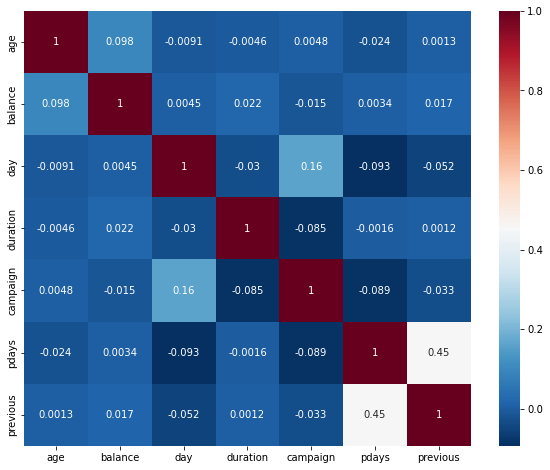

In [14]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

In [15]:
# Removing NA values in data set
bank1 = bank.dropna()       # No NA in given dataset
bank1.shape

(45211, 17)

In [16]:
bank.shape

(45211, 17)

In [17]:
#drop marital and contact columns
bank.drop(['marital'],axis=1, inplace=True)
bank.drop(['contact'],axis=1, inplace=True)
bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [18]:
bank.shape

(45211, 15)

C:\Users\Anuja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


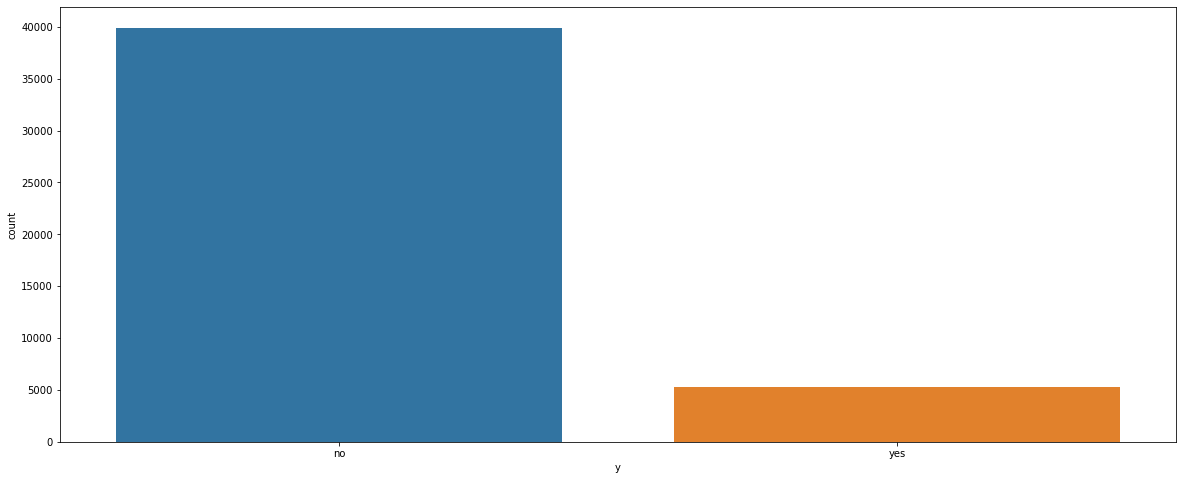

In [24]:
sns.countplot('y', data=bank)
plt.show()

In [ ]:
#Data is imbalance. As in the given dataset there are more records of client has not subscribed a term deposit than client who subscribed a term deposit

In [38]:
bank.describe(include='object')

,default,housing,loan,month,y
count,45211,45211,45211,45211,45211
unique,2,2,2,12,2
top,0,1,0,5,no
freq,44396,25130,37967,13766,39922


In [25]:
bank[['default','housing','loan']]=bank[['default','housing','loan']].replace(["yes","no"],["1","0"])
bank['month']=bank['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
bank['job']=bank['job'].replace(['unknown'],['other'])

bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,no
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,no
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,no


In [32]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', 'other',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [33]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [34]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [35]:
#Lable encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank['job']=le.fit_transform(bank['job'])
bank['education']=le.fit_transform(bank['education'])
bank['poutcome']=le.fit_transform(bank['poutcome'])

In [36]:
bank['outcome'] = bank.y.map({'no':0, 'yes':1})
bank.tail(10)

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,outcome
45201,53,4,2,0,583,0,0,17,11,226,1,184,4,2,yes,1
45202,34,0,1,0,557,0,0,17,11,224,1,-1,0,3,yes,1
45203,23,9,2,0,113,0,0,17,11,266,1,-1,0,3,yes,1
45204,73,6,1,0,2850,0,0,17,11,300,1,40,8,0,yes,1
45205,25,10,1,0,505,0,1,17,11,386,2,-1,0,3,yes,1
45206,51,10,2,0,825,0,0,17,11,977,3,-1,0,3,yes,1
45207,71,6,0,0,1729,0,0,17,11,456,2,-1,0,3,yes,1
45208,72,6,1,0,5715,0,0,17,11,1127,5,184,3,2,yes,1
45209,57,1,1,0,668,0,0,17,11,508,4,-1,0,3,no,0
45210,37,2,1,0,2971,0,0,17,11,361,2,188,11,1,no,0


In [68]:
bank.shape

(45211, 16)

In [69]:
bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,outcome
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,no,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,no,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,no,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,no,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,no,0


In [50]:
bank1=bank.copy()

In [66]:
bank1

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,outcome
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,no,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,no,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,no,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,no,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,2,0,825,0,0,17,11,977,3,-1,0,3,yes,1
45207,71,6,0,0,1729,0,0,17,11,456,2,-1,0,3,yes,1
45208,72,6,1,0,5715,0,0,17,11,1127,5,184,3,2,yes,1
45209,57,1,1,0,668,0,0,17,11,508,4,-1,0,3,no,0


In [67]:
bank1.dtypes

age           int64
job           int32
education     int32
default      object
balance       int64
housing      object
loan         object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
y            object
outcome       int64
dtype: object

# Oversampling

In [71]:
!pip install -U imbalanced-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Anuja\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\Anuja\anaconda3\python.exe -m pip install --upgrade pip' command.



  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
     --------------------------------------- 14.7/14.7 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1


In [72]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\Anuja\anaconda3\python.exe -m pip install --upgrade pip' command.


In [73]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

You should consider upgrading via the 'C:\Users\Anuja\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1
  Running setup.py install for scikit-learn: started
  Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\anuja\anaconda3\lib\site-packages\scikit_learn-1.1.1.dist-info\
   from C:\Users\Anuja\anaconda3\Lib\site-packages\~cikit_learn-1.1.1.dist-info
  Moving to c:\users\anuja\anaconda3\lib\site-packages\sklearn\
   from C:\Users\Anuja\anaconda3\Lib\site-packages\~-learn


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [36 lines of output]
  Partial import of sklearn during the build process.
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Anuja\AppData\Local\Temp\pip-install-dzd_fpsh\scikit-learn_8c387332478c4f6799f5f850718010b7\setup.py", line 303, in <module>
      setup_package()
    File "C:\Users\Anuja\AppData\Local\Temp\pip-install-dzd_fpsh\scikit-learn_8c387332478c4f6799f5f850718010b7\setup.py", line 299, in setup_package
      setup(**metadata)
    File "C:\Users\Anuja\anaconda3\lib\site-packages\numpy\distutils\core.py", line 135, in setup
      config = configuration()
    File "C:\Users\Anuja\AppData\Local\Temp\pip-install-dzd_fpsh\scikit-learn_8c387332478c4f6799f5f85071801

In [75]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
y = bank1['outcome']
x = bank1.drop(['outcome','y'], axis = 1)

In [76]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: outcome, Length: 45211, dtype: int64

In [77]:
x

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,2,0,825,0,0,17,11,977,3,-1,0,3
45207,71,6,0,0,1729,0,0,17,11,456,2,-1,0,3
45208,72,6,1,0,5715,0,0,17,11,1127,5,184,3,2
45209,57,1,1,0,668,0,0,17,11,508,4,-1,0,3


In [78]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
x, y = make_classification(n_samples=15000, weights=[0.99], flip_y=0)

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 14850, 1: 150})
Counter({0: 14850, 1: 14850})


In [80]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
y1 = bank1['outcome']
x1= bank1.drop(['outcome','y'], axis = 1)

In [83]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x1, y1)

In [84]:
print('original dataset shape:', Counter(y1))

original dataset shape: Counter({0: 39922, 1: 5289})


In [85]:
print('Over Sampled dataset shape:', Counter(y_ros))

Over Sampled dataset shape: Counter({0: 39922, 1: 39922})


In [86]:
y_ros

0        0
1        0
2        0
3        0
4        0
        ..
79839    1
79840    1
79841    1
79842    1
79843    1
Name: outcome, Length: 79844, dtype: int64

In [87]:
x_ros

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,34,0,2,0,4254,1,0,21,11,714,1,-1,0,3
79840,30,0,1,0,1265,1,1,26,5,414,2,-1,0,3
79841,60,6,2,0,4,1,0,2,12,415,1,190,5,0
79842,32,10,2,0,0,1,1,13,5,440,2,-1,0,3


In [88]:
df1 = pd.DataFrame(x_ros)

df1['outcome'] = y_ros
  
# Observe the result
df1

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,outcome
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,34,0,2,0,4254,1,0,21,11,714,1,-1,0,3,1
79840,30,0,1,0,1265,1,1,26,5,414,2,-1,0,3,1
79841,60,6,2,0,4,1,0,2,12,415,1,190,5,0,1
79842,32,10,2,0,0,1,1,13,5,440,2,-1,0,3,1


C:\Users\Anuja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


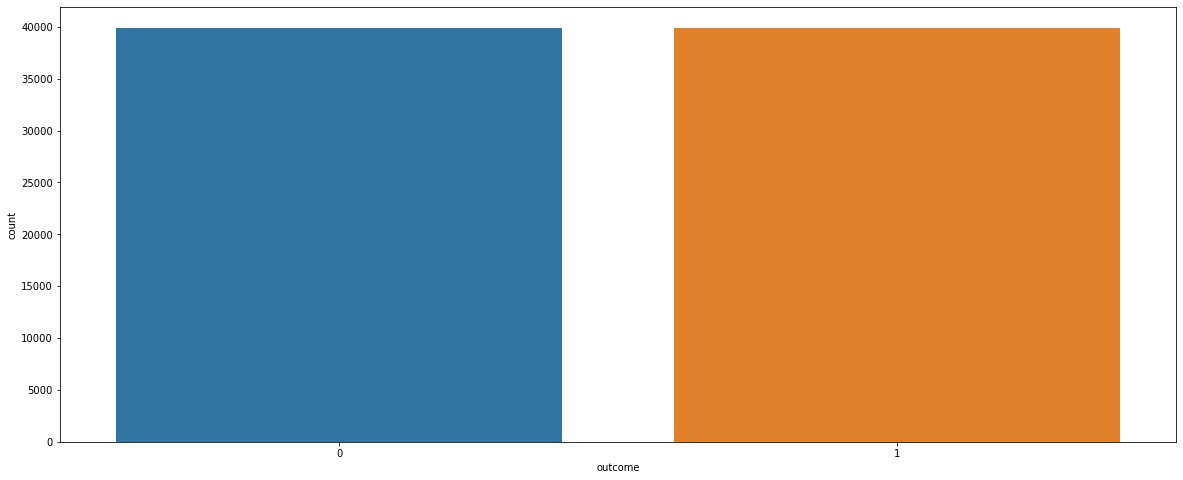

In [89]:
# Now after sampling data is balanced

sns.countplot('outcome', data=df1)
plt.show()

In [90]:
df1.to_csv("bank_oversample.csv", index = False) # for future use

In [91]:
df1

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,outcome
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,34,0,2,0,4254,1,0,21,11,714,1,-1,0,3,1
79840,30,0,1,0,1265,1,1,26,5,414,2,-1,0,3,1
79841,60,6,2,0,4,1,0,2,12,415,1,190,5,0,1
79842,32,10,2,0,0,1,1,13,5,440,2,-1,0,3,1


In [92]:
# Dividing our data into input and output variables 
feature=['age','balance','duration','campaign']
target_output=['outcome']
X = df1[feature]
Y = df1[target_output]

In [93]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Anuja\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [94]:
classifier.coef_ #coefficients of features

array([[ 6.47642357e-03,  5.98515402e-05,  4.62002444e-03,
        -1.67837203e-01]])

In [95]:
classifier.predict_proba(X)

array([[0.49272628, 0.50727372],
       [0.66736733, 0.33263267],
       [0.75318287, 0.24681713],
       ...,
       [0.34852908, 0.65147092],
       [0.40333334, 0.59666666],
       [0.47639571, 0.52360429]])

In [96]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [97]:
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [98]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[32190  7732]
 [14289 25633]]


In [ ]:
#Calculate Accuraccy
# Accuracy = TP+TN/ TP+FP+TN+FN

In [99]:
((33190+25633)/(32190+25633+7732+14289))*100   #80% Model accuracy

73.67241120184359

In [100]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y,y_pred))

0.7241996893943189


In [101]:
y_pred = classifier.predict(X)
print(accuracy_score(Y,y_pred))

0.7241996893943189


In [102]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75     39922
           1       0.77      0.64      0.70     39922

    accuracy                           0.72     79844
   macro avg       0.73      0.72      0.72     79844
weighted avg       0.73      0.72      0.72     79844



In [ ]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

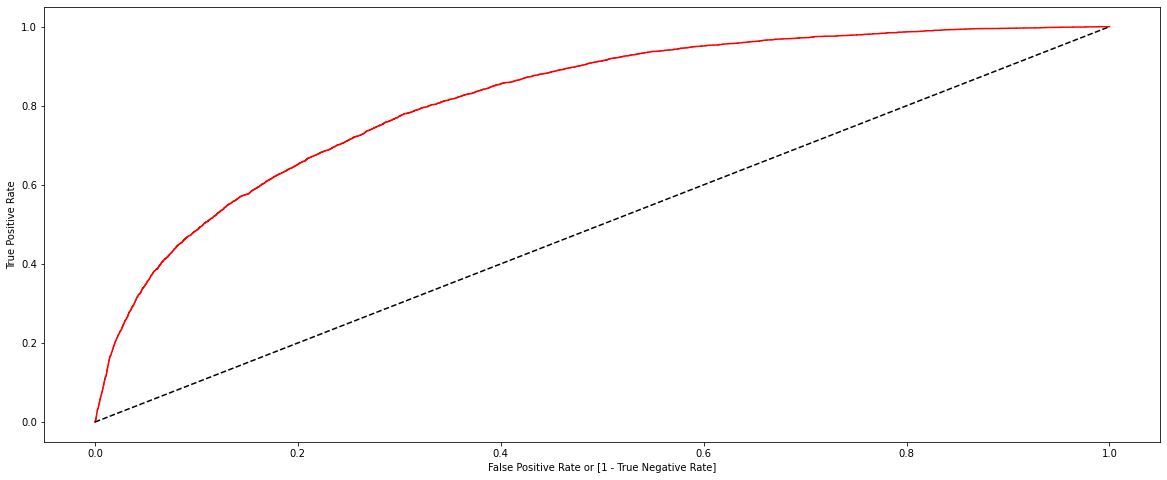

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [104]:
auc

0.7241996893943189